### **(6) 무지의 먹방 라이브**

**제공 링크**
https://school.programmers.co.kr/learn/courses/30/lessons/42891

**문제요약**

회전판에 먹어야할 N개의 음식이 있다. **각 음식에는 1부터 N까지 번호**가 붙어있으며, 무지는 다음과 같은 방법으로 음식을 섭취한다.

    1. 무지는 1번 음식부터 먹기 시작하며, 회전판은 번호가 증가하는 순서대로 음식을 무지 앞으로 가져다 놓습니다.
    2. 마지막 번호의 음식을 섭취한 후에는 회전판에 의해 다시 1번 음식이 무지 앞으로 옵니다.
    3. 무지는 음식 하나를 1초 동안 섭취한 후 남으 음식은 그대로 두고, 다음 음식을 섭취한다.
       다음 음식이란, 아직 남은 음식 중 다음으로 섭취해야 할 가장 가까운 번호의 음식을 말한다.
    4. 회전판이 다음 음식을 무지 앞으로 가져오는 데 걸리는 시간은 없다고 가정한다.

먹방을 시작한 지 K초 후에 방송이 잠시 중단 됐다. 다음 방송을 이어갈 때, **몇 번 음식부터 섭취해야 하는지를 알고자 한다.**
**각 음식을 모두 먹는 데 필요한 시간이 담겨 있는 배열 food_times**, **네트워크 장애가 발생한 시간 K초가 매개변수**로 주어질 때 몇 번 음식부터 다시 섭취하면 되는지 return 하도록 solution 함수 완성하시오.

**제한 사항**
* food_times는 각 음식을 모두 먹는 데 필요한 시간이 음식의 번호 순서대로 들어 있는 배열이다.
* k는 방송이 중단된 시간을 나타낸다.
* 만약 더 섭취해야 할 음식이 없다면 -1을 반환한다.

**정확성 테스트 제한 사항**
* 1 ≤ food_times의 길이 ≤ 2,000
* 1 ≤ food_times의 원소(자연수) ≤ 1,000  
* 1 ≤ k ≤ 2,000,000

**효율성 테스트 제한 사항(점수 가산점 있음)**
* 1 ≤ food_times의 길이 ≤ 200,000 
* 1 ≤ food_times의 원소(자연수) ≤ 100,000,000 
* 1 ≤ k(자연수) ≤ 2 x 10^13 

**입출력 예시**
| food_times  |  k  |  result |
|---|---|---|
|  `[3, 1, 2]`  |  5  |    1    |


**입출력 예시에 대한 설명**
* 0 ~ 1 초 동안에 1번 음식을 섭취한다. 남은 시간은 `[2, 1, 2]` 이다.
* 1 ~ 2 초 동안에 2번 음식을 섭취한다. 남은 시간은 `[2, 0, 2]` 이다.
* 2 ~ 3 초 동안에 3번 음식을 섭취한다. 남은 시간은 `[2, 0, 1]` 이다.
* 3 ~ 4 초 동안에 1번 음식을 섭취한다. 남은 시간은 `[1, 0, 1]` 이다.
* 4 ~ 5 초 동안 (2번 음식은 다 먹었으므로) 3번 음식을 먹는다. 남은 시간은 `[1, 0, 0]`이다.
* **5초(k)에서 네트워크 장애가 발생**했다. 1번 음식을 먹어야 할 때 중단되었으므로, **1번(result) 음식부터** 다시 먹기 시작하면 된다. 


### **작성 코드 요약**

    1. food_times, k 입력
    2. 효율성 적용 못하면 함수 종료
    3. 음식의 개수, 현재 음식의 인덱스 번호 정의
    4. k초가 1초 이상 남았을 경우 반복문 
    5. k초가 1초 이상 남았는데 음식 다 먹은 경우는 -1 반환
    6. 음식이 남았을 경우는 인덱스에 해당하는 값 -1씩 누적
    7. 다음으로 이동하는 인덱스 정의
    8. 인덱스에 해당하는 음식 번호 정의 

In [ ]:
# 기본 제공 코드
#def solution(food_times, k):
#    answer = 0
#    return answer

### **제출 코드**

In [3]:
food_times = list(map(int, input().split()))    #  각 음식을 모두 먹는 데 필요한 시간이 담겨 있는 배열
k = int(input())                                #  네트워크 장애가 발생한 시간 K초

def solution(food_times, k):
    if not (1 <= len(food_times) <= 200000 or 1 <= k <= 2 * 10**13):
        print("입력 조건을 만족하지 않습니다.")
        return

    N = len(food_times)  # 음식의 개수
    idx = 0              # 현재 음식의 인덱스

    while k > 0:        
        if sum(food_times) == 0:             # 모든 음식을 먹었을 경우   
            return -1                       # -1 반환
        
        if food_times[idx] != 0:           # 현재 음식이 남아있을 때
            food_times[idx] -= 1           # 음식을 하나 먹음
            k -= 1                         # 남은 시간을 1초 감소
            
        idx = (idx + 1) % N                # 다음 음식으로 인덱스를 순환

    answer = (idx + 1) % N  # 모든 음식을 먹지 않은 경우, 다음에 먹어야 할 음식의 번호

    
    return  answer

answer = solution(food_times, k)
print("다음에 먹어야 할 음식의 번호:", answer)

3 1 2
5
다음에 먹어야 할 음식의 번호: 1


### **코드가 어떻게 돌아가는지 음식 리스트 정리한 결과**

In [4]:
food_times = list(map(int, input().split()))        #  각 음식을 모두 먹는 데 필요한 시간이 담겨 있는 배열
k = int(input())                                    #  네트워크 장애가 발생한 시간 K초

def solution(food_times, k):
    if not (1 <= len(food_times) <= 200000 or 1 <= k <= 2 * 10**13):
        print("입력 조건을 만족하지 않습니다.")
        return

    N = len(food_times)  # 음식의 개수
    idx = 0              # 현재 음식의 인덱스
    result = []          # 결과를 저장할 리스트

    while k > 0:        
        if sum(food_times) == 0:             # 모든 음식을 먹었을 경우   
            return -1                       # -1 반환
        
        if food_times[idx] != 0:           # 현재 음식이 남아있을 때
            food_times[idx] -= 1           # 음식을 하나 먹음
            k -= 1                         # 남은 시간을 1초 감소
            result.append(list(food_times))  # 현재 음식 상태를 결과 리스트에 추가

        idx = (idx + 1) % N                # 다음 음식으로 인덱스를 순환

    answer = (idx + 1) % N  # 모든 음식을 먹지 않은 경우, 다음에 먹어야 할 음식의 번호

    
    return result, answer

result, answer = solution(food_times, k)
print("시간이 지남에 따라 음식의 시간이 담긴 결과:", result)
print("다음에 먹어야 할 음식의 번호:", answer)


3 1 2
5
시간이 지남에 따라 음식의 시간이 담긴 결과: [[2, 1, 2], [2, 0, 2], [2, 0, 1], [1, 0, 1], [1, 0, 0]]
다음에 먹어야 할 음식의 번호: 1


### **결과 : 실행결과는 통과 됐으나 효율성 테스트 무참히 실패**

ㅠ_ㅠ

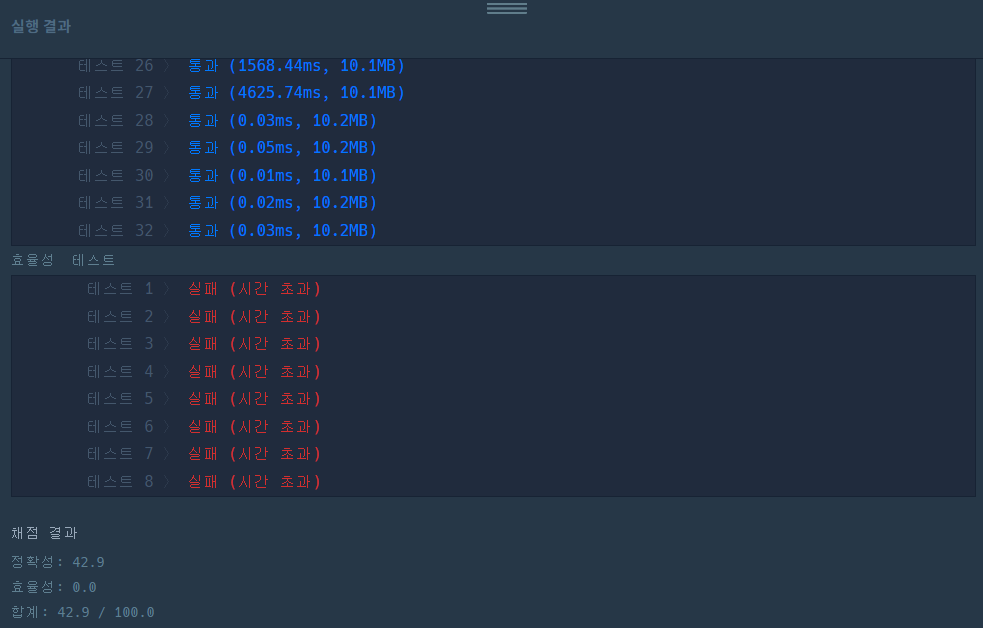